In [10]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
# Load the preprocessed and balanced dataset
data = np.load('fruits_dataset.npz')
train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']
test_images = data['test_images']
test_labels = data['test_labels']



In [3]:
# Flatten the images and normalize the pixel values to [0, 1]
train_images = train_images.reshape(-1, 224*224*3) / 255.0
val_images = val_images.reshape(-1, 224*224*3) / 255.0
test_images = test_images.reshape(-1, 224*224*3) / 255.0




In [4]:
# Train an SVM classifier on the training set
svm_classifier = SVC(kernel='linear', C=1, gamma='scale')
svm_classifier.fit(train_images, train_labels)



SVC(C=1, kernel='linear')

In [5]:
# Evaluate the SVM classifier on the validation set
val_predictions = svm_classifier.predict(val_images)
val_accuracy = accuracy_score(val_labels, val_predictions)
print('Validation Accuracy:', val_accuracy)



Validation Accuracy: 1.0


In [6]:
# Evaluate the SVM classifier on the test set
test_predictions = svm_classifier.predict(test_images)
test_accuracy = accuracy_score(test_labels, test_predictions)
print('Test Accuracy:', test_accuracy)

Test Accuracy: 1.0


In [8]:
# Define the list of fruit classes
fruit_classes = ['Banana', 'Corn', 'Papaya', 'Blueberry', 'Plum', \
                 'Pineapple', 'Raspberry', 'Strawberry', 'Peach']

<Axes: >

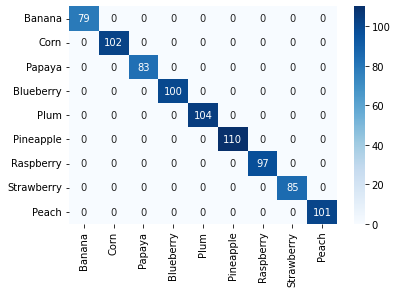

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=fruit_classes, yticklabels=fruit_classes)

In [21]:
import joblib as jb

In [22]:
jb.dump(svm_classifier,'model-svc.pkl')

['model-svc.pkl']